# Statistical Parametric Mapping (SPM) t test

This notebook describes a parametric t-test using **spm1d**. For additional details refer to the documentation at [spm1d.org](http://www.spm1d.org)

____________
## Step 1:  Load the data

Load the **Warmenhoven2018-bow-force** data file (in the "Data" folder of the seminar materials).

In [1]:
load('Warmenhoven2018-bow-force.mat');

____________
## Step 2:  Rename the variables

We will analyze the **Pin_Force_Bow_Female** and **Pin_Force_Bow_Male** variables from the **Warmenhoven2018-bow-force** data file. Let's transpose these (51 x 10) arrays and rename these as **yA** and **yB**, respectively, to emphasize that **spm1d** and **fda** require the data in different formats.

In [2]:
yA = Pin_Force_Bow_Male';   %(10 x 51) array
yB = Pin_Force_Bow_Female'; %(10 x 51) array

____________
## Step 3:  Conduct t test

We'll first conduct the test the consider the details.  

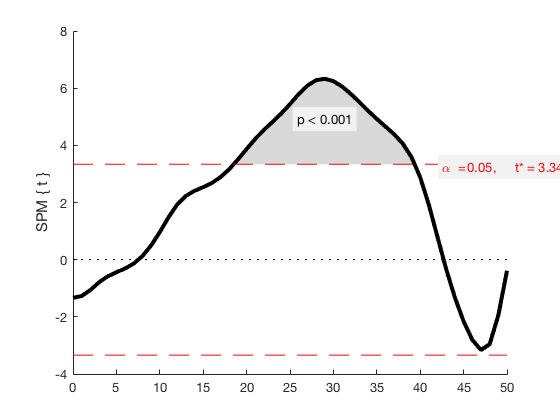

In [3]:
spm  = spm1d.stats.ttest2(yA, yB);
spmi = spm.inference(0.05, 'two_tailed', true);

spmi.plot();
spmi.plot_threshold_label(); 
spmi.plot_p_values();

Results indicate a significant between-group difference (p < 0.001) between approximately Frame 18 and 40. Let's consider the code and also the results in more detail.

First, the **spm1d.stats.ttest2** function is used to compute the test statistic value (in this case: the t value) a parametric two-sample t test. The dots in "**spm1d.stats.ttest2**" indicate the location of the function in the **spm1d** directory structure.  In this case, "**spm1d.stats.ttest2**" means that there is a **MATLAB** function defined in a file called "ttest2.m" which is located in the directory: **./+spm1d/+stats/**.  The "+" symbol at the beginning of the directory name allows you to access functions using this dot syntax.

The output from **ttest2** is named "**spm**" above, but any variable name is fine. The variable is a **MATLAB** object, which is a special kind of **MATLAB** structure to which both variables (also called "attributes") and functions (also called "methods") can be attached. The variable's main attributes can be shown using the **disp** command like this:

In [4]:
disp(spm)


SPM{t}
         z: [1×51 double]
        df: [1 18]
      fwhm: 9.3476
    resels: [1 5.3490]



And the attributes can also be accesses using the usual "dot" syntax like this: 

In [5]:
disp(spm.df)

     1    18



The attributes are:

- **z**:  test statistic continuum

- **df**: degrees of freedom

- **fwhm**:  estimated smoothness (the full-width-at-half-maximum of a Gaussian kernel that would, when convolved with uncorreletaed data, would produce the same smoothness as the observed residuals. [More details regarding fwhm are available here.](http://www.spm1d.org/rft1d/Theory.html))

- **resels**: the resolution element (resel) counts; the first count is the number of unbroken continuum segments, and the second count is the continuum size (here 50 (51-1)) divided by the fwhm.

The **df** and **resels** are the two parameters needed for statistical inference.  Note that **df** defines the shape of the [Student's t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) and is used for computing probabilities in common t tests involving 0D data in software like SPSS and Excel. **spm1d** uses [Random Field Theory](http://www.spm1d.org/rft1d/Theory.html) probability distributions to conduct parametric statistical inference, and these distributions require the additional **resels** parameter.

In addition to the attributes, a variety of methods are also attached to the **spm** object.  The code above calls the **inference** method in order to conduct statistical inference. The **df** and **resels** parameters are already stored in the **spm** variable, so the only additional details needed are the alpha level (here 0.05) and whether or not two-tailed inference should be conducted. If you're uncertain, "two_tailed" should always be true.

The output of inference is saved in a separate variable **spmi**, but again any variable name is possible.  This object contains some additional attributes:

In [6]:
disp(spmi)


SPM{t} inference
           z: [1×51 double]
          df: [1 18]
        fhwm: 9.3476
      resels: [1 5.3490]
       alpha: 0.0500
       zstar: 3.3402
    h0reject: 1
       p_set: 7.0803e-12
           p: 7.0803e-12



The specified alpha level is saved in **spmi**, along with the following attributes:

* **zstar**:  the critical threshold at the specified alpha level. If the t contrinuum traverses this threshold then the null hypothesis is rejected.

* **h0reject**:  the null hypothesis rejection decision (0 = fail to reject, 1 = reject)

* **p**:  the probability that random Gaussian continua with the given smoothness (fwhm) would produce a suprathreshold cluster of the given size if the null hypothesis (of no group differences) is true

* **p_set**:  the probability that random Gaussian continua with the given smoothness (fwhm) would produce a set of *C* suprathreshold clusters, each with an extent at least as big as the smallest cluster. **p_set** is the same as **p** if there is just one cluster. If there are two or more clusters **p_set** is always smaller than the largest cluster-specific p value.

In addition to these attributes the **spmi** object has a variety of methods including the three plotting methods:

* **plot**:  plot the test statistic continuum and the critical threshold(s)

* **plot_threshold_label**:  plot the alpha value and critical threshold value as text

* **plot_p_values**:  plot cluster-specific p values
